In [57]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
print (mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [58]:
X=mnist['data']
y=mnist['target']


In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt



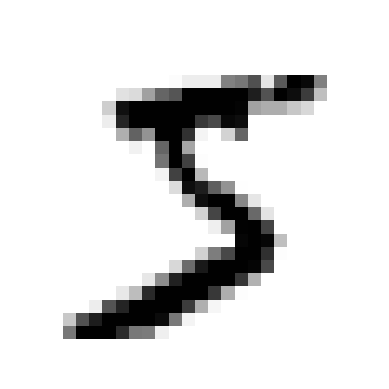

5


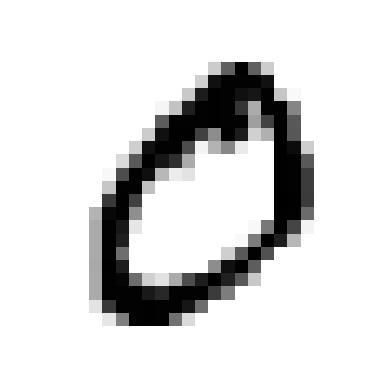

0


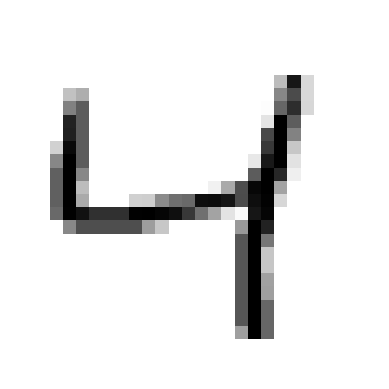

4


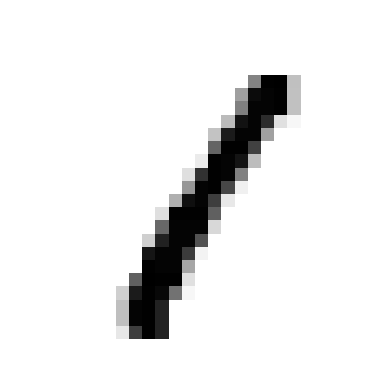

1


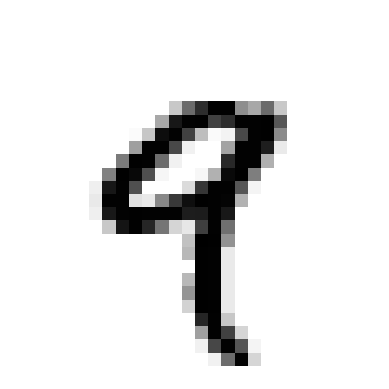

9


In [60]:
i=0
while i!=5:
        some_digit=X.iloc[i]
        some_digit_image = some_digit.to_numpy().reshape(28, 28)
        plt.imshow(some_digit_image, cmap="binary")
        plt.axis("off")
        plt.show()
        print (y[i])
        i=i+1

In [61]:
X_train,y_train,X_test,y_test=X.iloc[0:60000],y[0:60000],X.iloc[60000:],y[60000:]

In [62]:
y_train_5,y_test_5=y_train=='5',y_test=='5'

In [63]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(random_state=42)
model.fit(X_train,y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [64]:
from sklearn.metrics import root_mean_squared_error
preds=model.predict(X_train)


In [65]:
import pandas as pd
pd.DataFrame(preds,y_train)

,0
class,
5,True
0,False
4,False
1,False
9,False
...,...
8,False
3,False
5,True


In [66]:
type(mnist.data)

pandas.core.frame.DataFrame

In [67]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
sk_fold=StratifiedKFold(random_state=42,n_splits=3,shuffle=True)

In [76]:
for train_index,test_index in sk_fold.split(X_train,y_train_5):
    cloned_model=clone(model)
    X_train_folds=X_train.iloc[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_folds=X_train.iloc[test_index]
    y_test_folds=y_train_5[test_index]
    cloned_model.fit(X_train_folds,y_train_folds)

    fold_preds=cloned_model.predict(X_test_folds)
    print ((sum(fold_preds==y_test_folds))/len(y_test_folds))

    


0.9669
0.91625
0.96785


In [77]:
#now let us use cross val
from sklearn.model_selection import cross_val_score
print (cross_val_score(model,X_train,y_train_5,cv=3,scoring='accuracy'))

[0.95035 0.96035 0.9604 ]


In [ ]:
#so we are getting an accuracy of almost 96%
#it seems perfect, but remember: sampling data has almost 90% of not-5, 
#so if you always guess that an image is not a 5, you will be right about 90% of the time.
#This demonstrates why accuracy is generally not the preferred performance measure
#for classifiers, especially when you are dealing with skewed datasets (i.e., when some
#classes are much more frequent than others).

19357